In [92]:
# TP 01

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [94]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [95]:
!ls

 20210501.Discovery.ipynb   healthcare-dataset-stroke-data.csv	'new 6.txt'


In [96]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [97]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [98]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [99]:
for i in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    print(f'Variable: {i}')
    print(f'Cantidad de valores que toma: {df[i].value_counts().count()}')
    df[i] = df[i].astype("category")

Variable: gender
Cantidad de valores que toma: 3
Variable: hypertension
Cantidad de valores que toma: 2
Variable: heart_disease
Cantidad de valores que toma: 2
Variable: ever_married
Cantidad de valores que toma: 2
Variable: work_type
Cantidad de valores que toma: 5
Variable: Residence_type
Cantidad de valores que toma: 2
Variable: smoking_status
Cantidad de valores que toma: 4
Variable: stroke
Cantidad de valores que toma: 2


In [100]:
df.dtypes

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

In [101]:
df['edad_dia'] = df.age * 365

In [102]:
df[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,edad_dia
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,9490.0


In [103]:
df[df.bmi > 60]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,edad_dia
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,20805.0
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,18980.0
466,1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0,22265.0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,15330.0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,8395.0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0,19345.0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,6205.0
2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0,8760.0
2840,65895,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0,18980.0
3825,72784,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0,18980.0


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

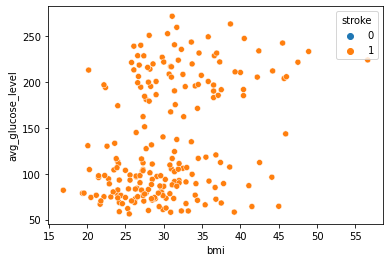

In [104]:
import seaborn as sbn
sbn.scatterplot(x='bmi', y='avg_glucose_level', hue='stroke', data=df[df.stroke==1])

# Imputacion de nulos

Imputar nulos para bmi y para los valores "unknown" de la columna smoking_status

## Unknown => NaN

In [105]:
df.loc[(df.smoking_status == 'Unknown'), "smoking_status"] = None

In [106]:
df[df.smoking_status.isna()]
# df.loc[(df.smoking_status == 'Unknown'), "smoking_status"]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,edad_dia
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1,21535.0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,NaN,1,28470.0
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1,28470.0
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1,20805.0
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,NaN,1,29930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,NaN,0,3285.0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,NaN,0,16425.0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,NaN,0,6570.0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,NaN,0,4745.0


In [107]:
df.smoking_status.value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Unknown               0
Name: smoking_status, dtype: int64

In [ ]:
df_strokes[df_strokes.age < 1].work_type.value_counts()
# df_strokes[df_strokes.age < 12].work_type.value_counts()
# 15 corte, <= 12 trabajo infantil, <10 no habría chance

## Imputacion de bmi

In [108]:
df['bmi_inputation'] = df['bmi']

In [109]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,edad_dia,bmi_inputation
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,24455.0,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,22265.0,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,29200.0,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,17885.0,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,28835.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,29200.0,NaN
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,29565.0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,12775.0,30.6
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,18615.0,25.6


In [ ]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_strokes_knn = diabetes.copy(deep=True)
df_strokes_MICE.iloc[:, :] = MICE_imputer.fit_transform(df_strokes_MICE)

# Label enconding y one hot encoding

gender, every_married, work_typt, residence_type, smoking_status son candidatos a label encoding o one hoy encoding

Contrary to the accepted answer, I would prefer to use tools provided by Scikit-Learn for this purpose. The main reason for doing so is that they can be easily integrated in a Pipeline.

Scikit-Learn itself provides very good classes to handle categorical data. Instead of writing your custom function, you should use LabelEncoder which is specially designed for this purpose.

Refer to the following code from the documentation:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"]) 

This automatically encodes them into numbers for your machine learning algorithms. Now this also supports going back to strings from integers. You can do this by simply calling inverse_transform as follows:

list(le.inverse_transform([2, 2, 1]))
This would return ['tokyo', 'tokyo', 'paris'].

Also note that for many other classifiers, apart from decision trees, such as logistic regression or SVM, you would like to encode your categorical variables using One-Hot encoding. Scikit-learn supports this as well through the OneHotEncoder class.

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree




from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"]) 

### Using categorical approach
This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ type. So you might have to change type to ‘category’ before using this approach.

#### converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
#### Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

In [76]:
df['ever_married_cat'] = df['ever_married'].cat.codes
df['residence_type_cat'] = df['Residence_type'].cat.codes
# son candidatos a label encoding porque al ser solo dos valores, el 0 y 1 cumplen su funcion,
#      mantiene una unica columna, es práctico 

In [77]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,edad_dia,ever_married_cat,residence_type_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,24455.0,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,22265.0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,29200.0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,17885.0,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,28835.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,29200.0,1,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,29565.0,1,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,12775.0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,18615.0,1,0


## One hot encoding

gender, smoking_status, work_type => one hoy encoding, para evitar que por ser varios valores les ponga un numero y asuma una jerarquía}

In [78]:
# Ref: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [79]:

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['gender']]).toarray(), columns=enc.get_feature_names(['gender']))
# merge with main df bridge_df on key values
df = df.join(enc_df)

In [80]:
enc_df = pd.DataFrame(enc.fit_transform(df[['work_type']]).toarray(), columns=enc.get_feature_names(['work_type']))
# merge with main df bridge_df on key values
df = df.join(enc_df)

In [81]:
enc_df = pd.DataFrame(enc.fit_transform(df[['smoking_status']]).toarray(), columns=enc.get_feature_names(['smoking_status']))
# merge with main df bridge_df on key values
df = df.join(enc_df)

In [82]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
